In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob

In [3]:
from sklearn.preprocessing import MinMaxScaler , PolynomialFeatures
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [4]:
# 한글 문제
# matplotlit의 기본 폰트에서 한글 지원되지 않기 때문에
# matplotlib의 폰트 변경 필요
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

In [5]:
data=glob('./data/final*')

In [6]:
data

['./data\\final_2019.csv',
 './data\\final_2020.csv',
 './data\\final_2021_1.csv',
 './data\\final_2021_2.csv']

In [7]:
# 연도별 데이터 통합
def load():
    data=glob('./data/final*')
    total=[]
    for i in data:
        total.append(pd.read_csv(i,encoding='cp949'))
    tot=pd.concat(total,axis=0)
    return tot

In [8]:
tot=load()

In [9]:
tot.head()

,DAY,TIME,STATION_NAME,GU,UP_POP,DOWN_POP,RAIN,HUMN,SNOW,SKY,ONDO,WINDD,WINDS,PM10,PM25
0,19/01/01,10:00,가락시장,송파구,300,307,0.0,44,0.0,3,-4.9,13,1.6,47,35
1,19/01/01,11:00,가락시장,송파구,377,450,0.0,41,0.0,1,-3.7,13,2.5,40,25
2,19/01/01,12:00,가락시장,송파구,527,498,0.0,47,0.0,3,-2.8,13,2.8,42,28
3,19/01/01,13:00,가락시장,송파구,485,453,0.0,49,0.0,3,-1.5,12,2.7,45,30
4,19/01/01,14:00,가락시장,송파구,562,496,0.0,51,0.0,3,-1.7,13,3.5,42,26


In [15]:
graph=feat(tot)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


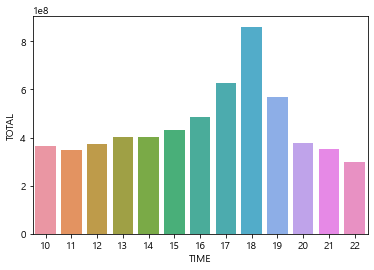

In [53]:
v=visual(graph)

In [54]:
v

,TOTAL
TIME,
10,364981246
11,350356289
12,373438352
13,401892627
14,400780541
15,430419457
16,486368886
17,626174582
18,860808776


## 가중치컬럼 test

In [25]:
w=pd.pivot_table(graph,index=['STATION_NAME'],values='TOTAL')

In [26]:
sum_t=sum(w['TOTAL'])

In [66]:
sub=np.log1p(w).sort_values('TOTAL',ascending=False)[:5]

<AxesSubplot:xlabel='STATION_NAME', ylabel='TOTAL'>

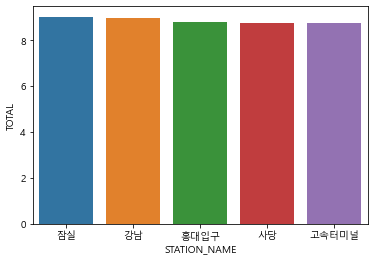

In [67]:
sns.barplot(x=sub.index,y=sub['TOTAL'])

In [78]:
sub_x=pd.concat([sub,sub2],axis=0).round(3)

In [79]:
sub_x

,TOTAL
STATION_NAME,
잠실,9.022
강남,8.960
홍대입구,8.786
사당,8.742
고속터미널,8.742
남태령,5.970
학여울,5.955
용답,5.928
창신,5.912


In [68]:
sub2=np.log1p(w).sort_values('TOTAL',ascending=False)[-5:]

<AxesSubplot:xlabel='STATION_NAME', ylabel='TOTAL'>

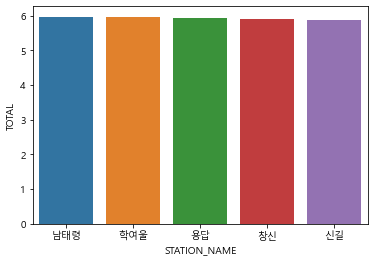

In [69]:
sns.barplot(x=sub2.index,y=sub2['TOTAL'])

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '잠실'),
  Text(1, 0, '강남'),
  Text(2, 0, '홍대입구'),
  Text(3, 0, '사당'),
  Text(4, 0, '고속터미널'),
  Text(5, 0, '남태령'),
  Text(6, 0, '학여울'),
  Text(7, 0, '용답'),
  Text(8, 0, '창신'),
  Text(9, 0, '신길')])

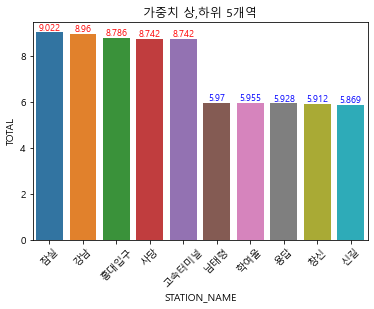

In [82]:
sns.barplot(x=sub_x.index,y=sub_x['TOTAL'])
for i, v in enumerate(sub_x.index):
    if i<5:
        plt.text(i, sub_x['TOTAL'][i],sub_x['TOTAL'][i],                 # 좌표 (x축 = i, y축 = y[0]..y[1], 표시 = y[0]..y[1])
                 fontsize = 9, 
                 color='red',
                 horizontalalignment='center',  # horizontalalignment (left, center, right)
                 verticalalignment='bottom')    # verticalalignment (top, center, bottom)
    else :
        plt.text(i, sub_x['TOTAL'][i],sub_x['TOTAL'][i],                 # 좌표 (x축 = i, y축 = y[0]..y[1], 표시 = y[0]..y[1])
         fontsize = 9, 
         color='blue',
         horizontalalignment='center',  # horizontalalignment (left, center, right)
         verticalalignment='bottom') 
        
plt.title('가중치 상,하위 5개역')
plt.xticks(rotation=45)

In [27]:
W_test=w/sum_t

In [48]:
W_test.sort_values('TOTAL')

,TOTAL
STATION_NAME,
신길,0.000853
창신,0.000890
용답,0.000905
학여울,0.000930
남태령,0.000944
...,...
고속터미널,0.015122
사당,0.015126
홍대입구,0.015813


# 전처리 함수

In [52]:
# 시간대별 지하철 이용객수 그래프
def visual(df):
    df2=df.copy()
    df2=feat(df2)
    df2['TIME']=[int(i.split(':')[0]) for i in df2['TIME']]
    pivot=pd.pivot_table(df2,index='TIME',values='TOTAL',aggfunc='sum')

    sns.barplot(pivot.index,pivot['TOTAL'])
    return(pivot)

In [12]:
# 합계와 시간대 컬럼 생성
def feat(dt):
    df=dt.copy()
    df['TOTAL']=df['UP_POP']+df['DOWN_POP']
    df['T']=[0 if (int(i.split(':')[0])>19) or (int(i.split(':')[0])<17) else 1 for i in df['TIME']]
    return df

In [39]:
# 가중치 컬럼 생성 후 필요없는 컬럼 제거
def weight(dt):
    df=dt.copy()
    mean=pd.pivot_table(df,index='STATION_NAME',values='TOTAL')
#     sum_m=sum(mean['TOTAL'])
#     w=mean/sum_m
    mm=MinMaxScaler()
    w=mm.fit_transform(mean)
    mean['W']=w
    df=pd.merge(df.drop(['UP_POP','DOWN_POP'],axis=1),mean.drop(['TOTAL'],axis=1),on='STATION_NAME')
    return df
    

In [30]:
# 로그변환
def log_trans(dt):
    df=dt.copy()
    feat=df.columns.drop('ONDO')
    df[feat]=np.log1p(df[feat])
    return df
    

In [40]:
# 모든함수 적용
def pre(dt):
    df=dt.copy()
    df=feat(df)
    df=weight(df).drop(['DAY','GU','TIME'],axis=1).set_index('STATION_NAME')
    df=log_trans(df)
    X=df.drop('TOTAL',axis=1)
    Y=df[['TOTAL']]
    return X,Y

In [41]:
X,Y=pre(tot)

In [83]:
X.head()

,RAIN,HUMN,SNOW,SKY,ONDO,WINDD,WINDS,PM10,PM25,T,W
STATION_NAME,,,,,,,,,,,
가락시장,0.0,3.806662,0.0,1.386294,-4.9,2.639057,0.955511,3.871201,3.583519,0.0,0.245604
가락시장,0.0,3.737670,0.0,0.693147,-3.7,2.639057,1.252763,3.713572,3.258097,0.0,0.245604
가락시장,0.0,3.871201,0.0,1.386294,-2.8,2.639057,1.335001,3.761200,3.367296,0.0,0.245604
가락시장,0.0,3.912023,0.0,1.386294,-1.5,2.564949,1.308333,3.828641,3.433987,0.0,0.245604
가락시장,0.0,3.951244,0.0,1.386294,-1.7,2.639057,1.504077,3.761200,3.295837,0.0,0.245604


In [84]:
Y.head()

,TOTAL
STATION_NAME,
가락시장,6.410175
가락시장,6.719013
가락시장,6.933423
가락시장,6.844815
가락시장,6.965080


# 회귀 모델링

In [87]:
def lr_eval(X,Y,method=None):
    global X_train, X_test, y_train, y_test
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)
    if method==None:
        lr=LinearRegression()
        lr.fit(X_train,y_train)

        pred=lr.predict(X_train)
        pred_t=lr.predict(X_test)
        

    elif method=='Poly':
        poly=Pipeline([('poly',PolynomialFeatures(degree=2)),
                      ('linear',LinearRegression())])
        lr=poly.fit(X_train,y_train)
        
        pred=lr.predict(X_train)
        pred_t=lr.predict(X_test)

    print('Train Data MSE : {0}, R2_score : {1}'.format(mean_squared_error(y_train,pred),r2_score(y_train,pred)))
    print('Test Data MSE : {0}, R2_score : {1}'.format(mean_squared_error(y_test,pred_t),r2_score(y_test,pred_t)))
    return lr

In [89]:
lr=lr_eval(X,Y)  # 일반 선형 성능

Train Data MSE : 0.311208134959513, R2_score : 0.6001342440206402
Test Data MSE : 0.31124221933614465, R2_score : 0.5988617147852522


In [88]:
lr2=lr_eval(X,Y,method='Poly') # 2차 다항회귀 성능

Train Data MSE : 0.27050097494790704, R2_score : 0.6520361233417233
Test Data MSE : 0.27111431169050415, R2_score : 0.6521926391297665
